# **New Year Sales Analysis**

# **Step 1: Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Step 2: Load and Explore the Dataset**

In [2]:
df = pd.read_csv('New _Year _Sales _Data.csv', encoding='latin1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# **Step 3: Data Cleaning**

In [4]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [5]:
df.drop(['unnamed1', 'Status'], axis=1, inplace=True)

In [6]:
df = df.dropna(subset=['Amount'])

In [7]:
df['Amount'] = df['Amount'].astype(int)

In [8]:
df.isnull().sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [50]:
df.tail()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206
11250,1002744,Brumley,P00281742,F,18-25,19,0,Maharashtra,Western,Healthcare,Office,3,188


# **Step 4: Data Overview and Summary**

In [46]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [47]:
df.nunique()

,0
User_ID,3752
Cust_name,1250
Product_ID,2350
Gender,2
Age Group,7
Age,81
Marital_Status,2
State,16
Zone,5
Occupation,15


# **Exploratory Data Analysis (EDA)**

# **1. Gender Analysis**

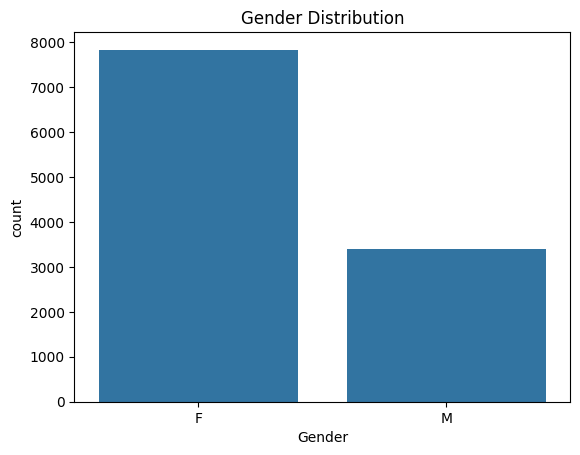

In [12]:
# Count plot for gender
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()

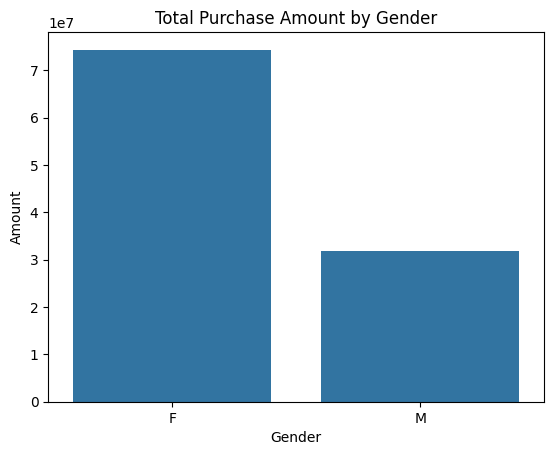

In [13]:
# Bar chart: Total purchase amount by gender
gender_sales = df.groupby('Gender')['Amount'].sum().reset_index()
sns.barplot(x='Gender', y='Amount', data=gender_sales)
plt.title('Total Purchase Amount by Gender')
plt.show()

# **2. Age Group Analysis**

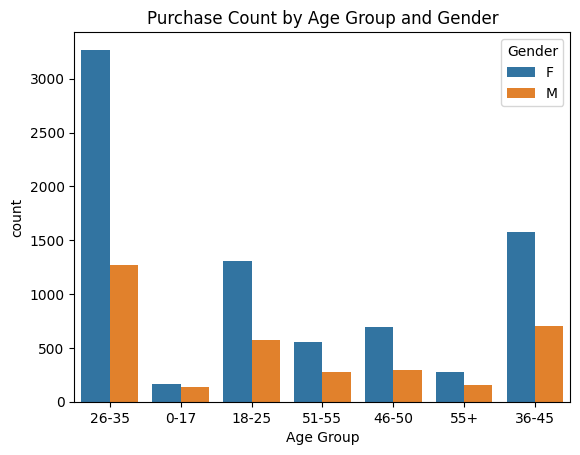

In [14]:
# Count plot by age group with hue for gender
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Purchase Count by Age Group and Gender')
plt.show()

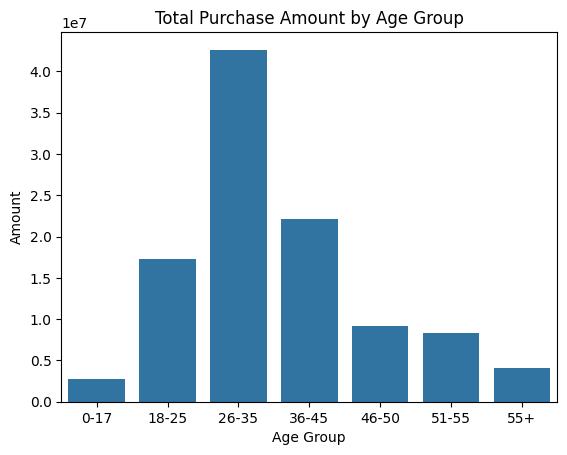

In [15]:
# Total purchase amount by age group
age_sales = df.groupby('Age Group')['Amount'].sum().reset_index()
sns.barplot(x='Age Group', y='Amount', data=age_sales)
plt.title('Total Purchase Amount by Age Group')
plt.show()

# **3. State Analysis**

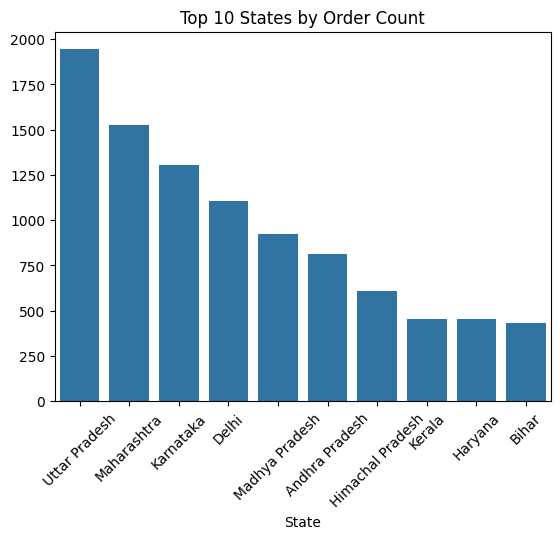

In [16]:
# Top 10 states by order count
top_states_orders = df['State'].value_counts().nlargest(10)
sns.barplot(x=top_states_orders.index, y=top_states_orders.values)
plt.title('Top 10 States by Order Count')
plt.xticks(rotation=45)
plt.show()

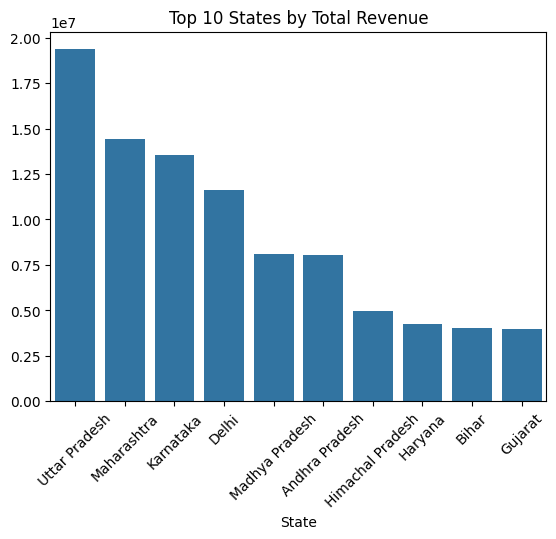

In [17]:
# Top 10 states by total revenue
top_states_amount = df.groupby('State')['Amount'].sum().nlargest(10)
sns.barplot(x=top_states_amount.index, y=top_states_amount.values)
plt.title('Top 10 States by Total Revenue')
plt.xticks(rotation=45)
plt.show()

# **4. Marital Status Analysis**

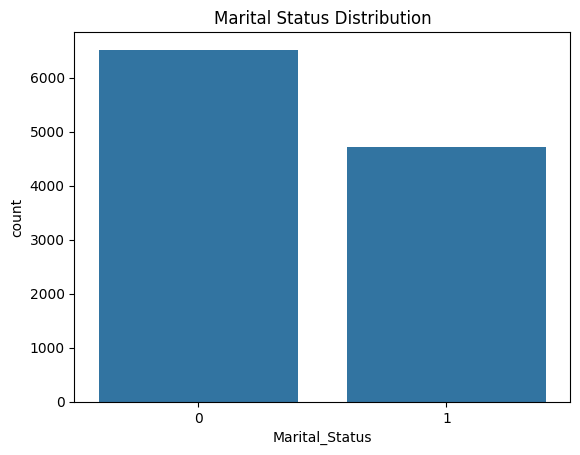

In [18]:
# Count plot for marital status
sns.countplot(x='Marital_Status', data=df)
plt.title('Marital Status Distribution')
plt.show()

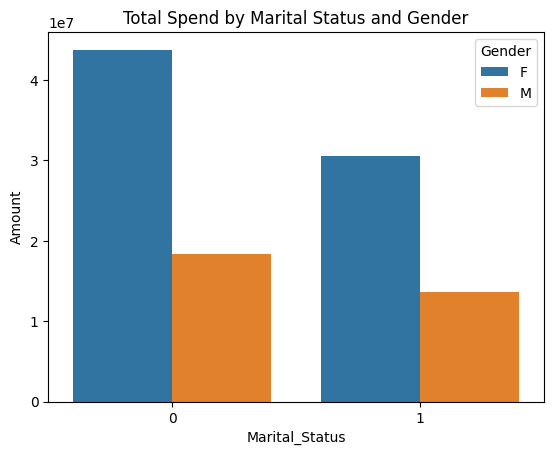

In [19]:
# Bar chart: Total amount spent by marital status, with gender as hue
marital_sales = df.groupby(['Marital_Status', 'Gender'])['Amount'].sum().reset_index()
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=marital_sales)
plt.title('Total Spend by Marital Status and Gender')
plt.show()

# **5. Occupation Analysis**

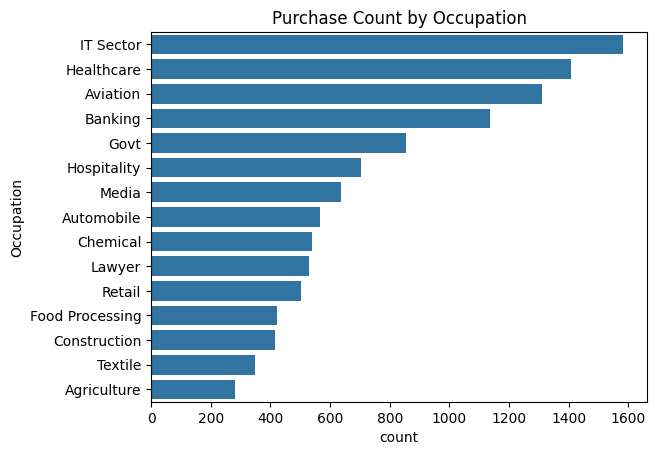

In [20]:
# Count plot for occupation
sns.countplot(y='Occupation', data=df, order=df['Occupation'].value_counts().index)
plt.title('Purchase Count by Occupation')
plt.show()

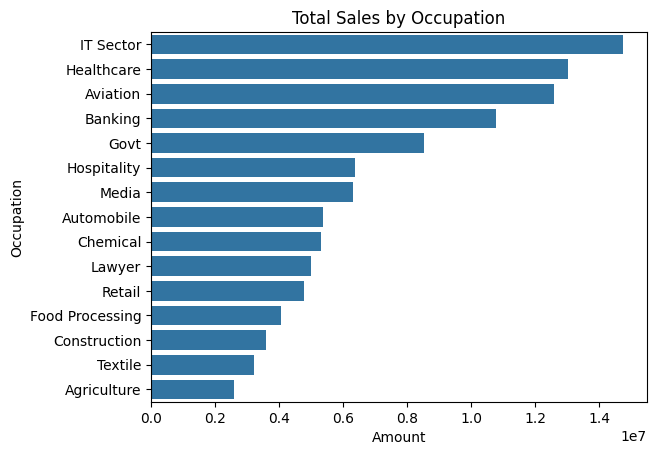

In [21]:
# Bar chart: Total sales by occupation
occupation_sales = df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Amount', y='Occupation', data=occupation_sales)
plt.title('Total Sales by Occupation')
plt.show()

# **6. Product Category Analysis**

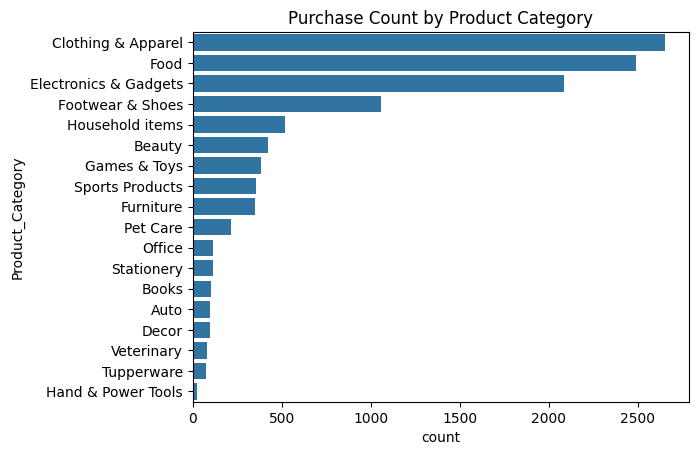

In [22]:
# Count plot for product category
sns.countplot(y='Product_Category', data=df, order=df['Product_Category'].value_counts().index)
plt.title('Purchase Count by Product Category')
plt.show()

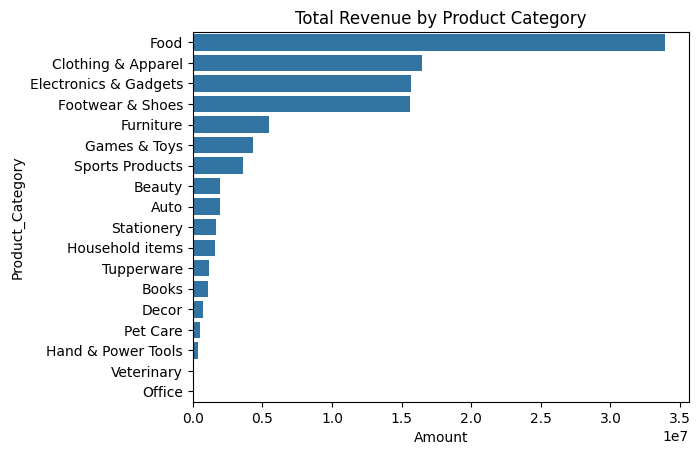

In [23]:
# Bar chart: Top categories by revenue
category_sales = df.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index()
sns.barplot(x='Amount', y='Product_Category', data=category_sales)
plt.title('Total Revenue by Product Category')
plt.show()

# **summary insights**

In [49]:
# Example: Print summary insights
print("Summary of Findings:")
print("- Gender with highest purchasing power:", gender_sales.loc[gender_sales['Amount'].idxmax(), 'Gender'])
print("- Age group with most purchases:", age_sales.loc[age_sales['Amount'].idxmax(), 'Age Group'])
print("- State generating highest revenue:", top_states_amount.idxmax())
print("- Top contributing occupation:", occupation_sales.loc[0, 'Occupation'])
print("- Most popular product category:", category_sales.loc[0, 'Product_Category'])

Summary of Findings:
- Gender with highest purchasing power: F
- Age group with most purchases: 26-35
- State generating highest revenue: Uttar Pradesh
- Top contributing occupation: IT Sector
- Most popular product category: Food


# **# Additional Questions**

# **# 1. Which age group contributes the most to each product category, and does this vary by gender?**

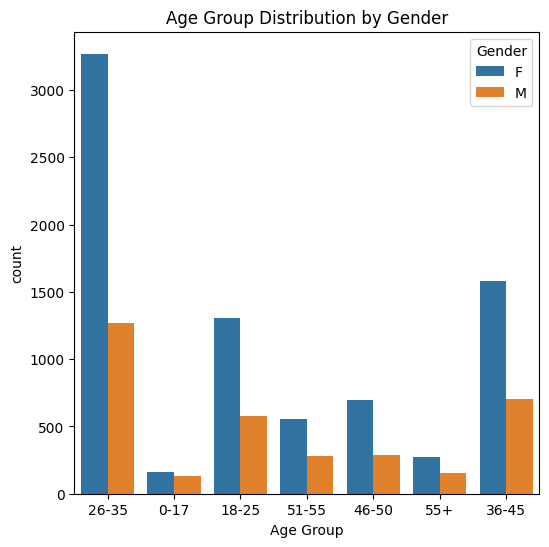

In [26]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Age Group', hue='Gender', data=df)
plt.title('Age Group Distribution by Gender')
plt.show()

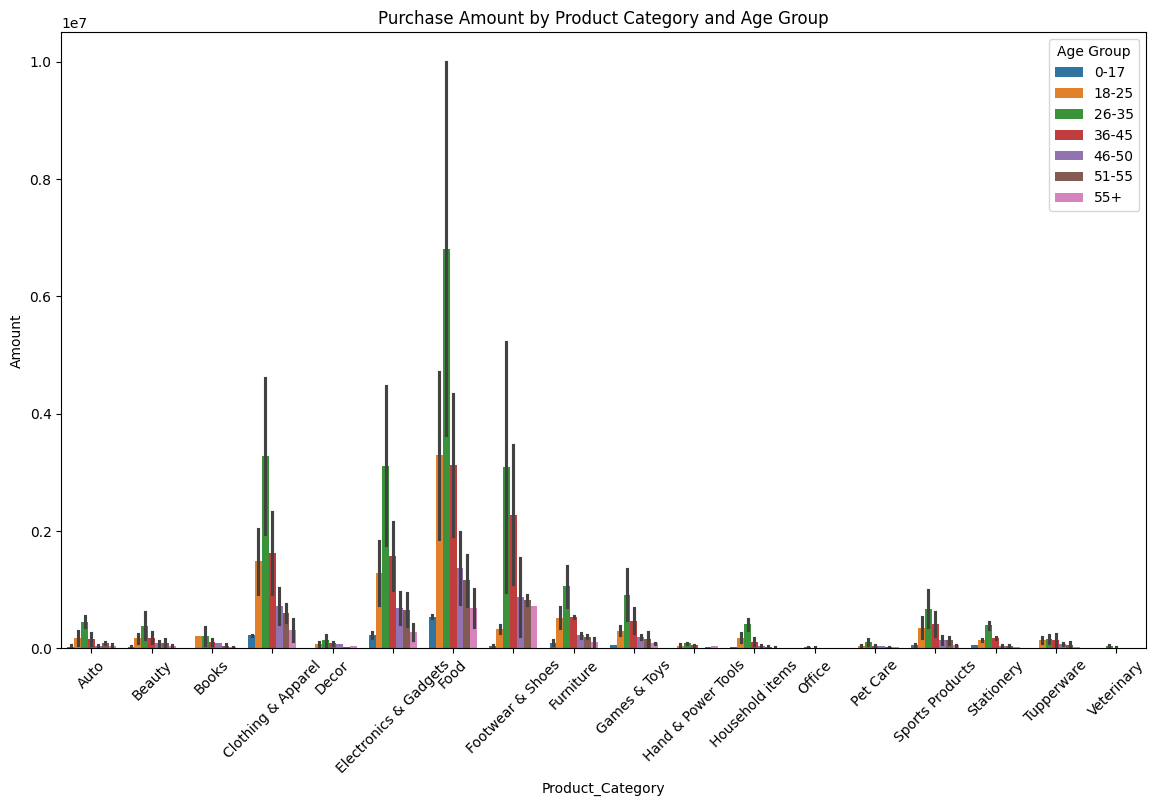

In [30]:
product_age_gender_sales = df.groupby(['Product_Category', 'Age Group', 'Gender'])['Amount'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Category', y='Amount', hue='Age Group', data=product_age_gender_sales)
plt.title('Purchase Amount by Product Category and Age Group')
plt.xticks(rotation=45)
plt.show()

# **2. How does the amount spent vary by marital status across different age groups?**

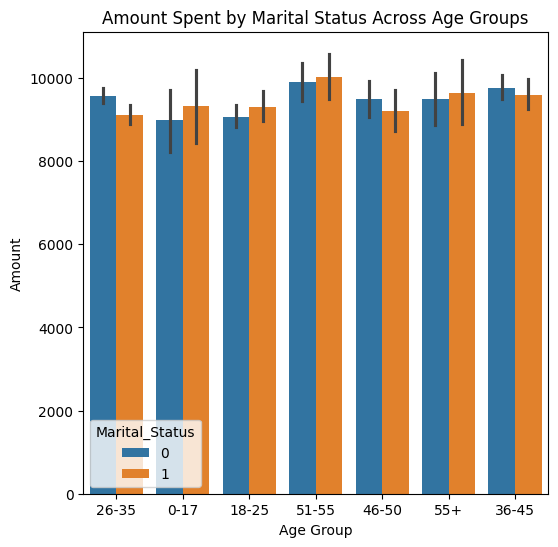

In [52]:
plt.figure(figsize=(6, 6))
sns.barplot(x='Age Group', y='Amount', hue='Marital_Status', data=df)
plt.title('Amount Spent by Marital Status Across Age Groups')
plt.show()

# **3. Which states show the highest growth in orders and revenue, and are there seasonal spikes in sales?**
# Since we don't have explicit date or time data for seasonal spikes, ignoring seasonal spikes here.

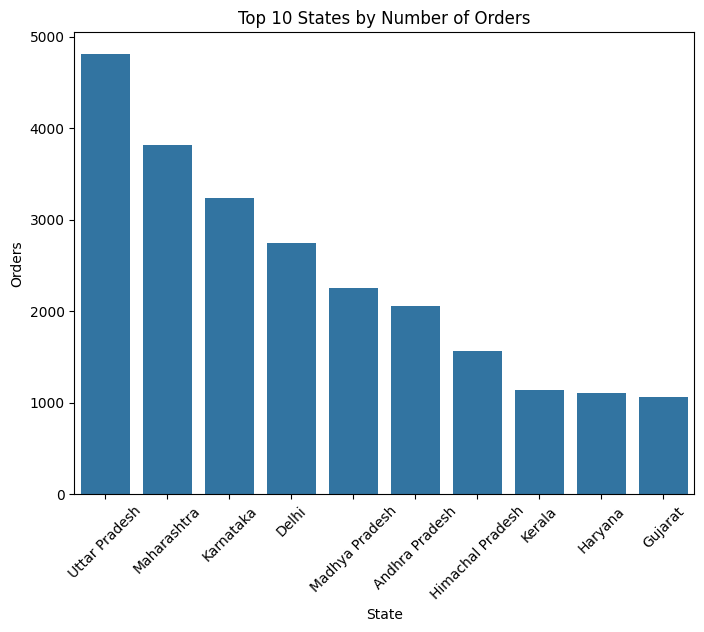

In [45]:
state_orders_revenue = df.groupby('State').agg({'Orders':'sum', 'Amount':'sum'}).reset_index()
top_states = state_orders_revenue.sort_values(by='Orders', ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x='State', y='Orders', data=top_states)
plt.title('Top 10 States by Number of Orders')
plt.xticks(rotation=45)
plt.show()

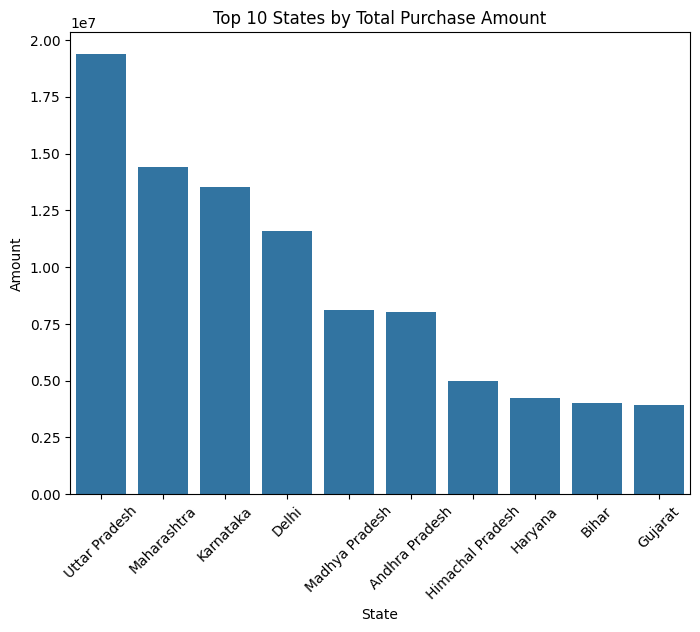

In [38]:
plt.figure(figsize=(8, 6))
top_states_revenue = state_orders_revenue.sort_values(by='Amount', ascending=False).head(10)
sns.barplot(x='State', y='Amount', data=top_states_revenue)
plt.title('Top 10 States by Total Purchase Amount')
plt.xticks(rotation=45)
plt.show()

# **4. Are there specific occupations that prefer particular product categories more than others?**

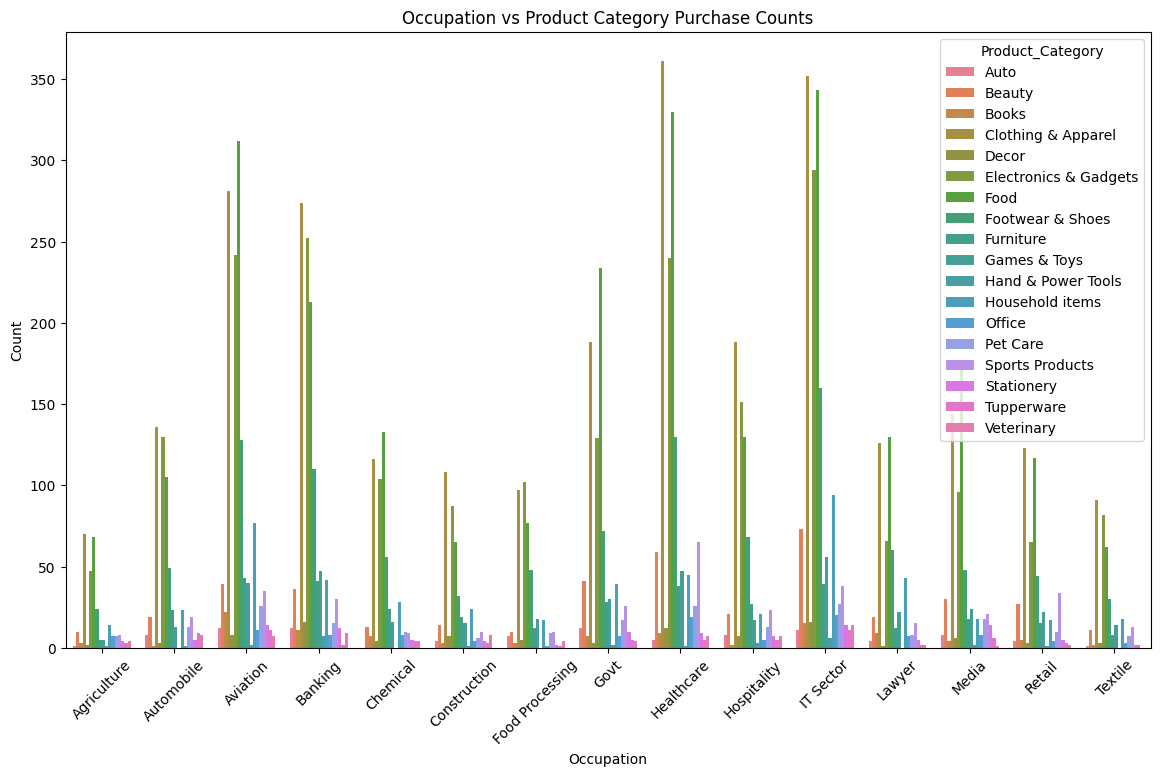

In [54]:
occupation_product_counts = df.groupby(['Occupation', 'Product_Category']).size().reset_index(name='Count')
plt.figure(figsize=(14, 8))
sns.barplot(x='Occupation', y='Count', hue='Product_Category', data=occupation_product_counts)
plt.title('Occupation vs Product Category Purchase Counts')
plt.xticks(rotation=45)
plt.show()

# **5. What is the correlation between age and spending amount, and does this differ by gender?**

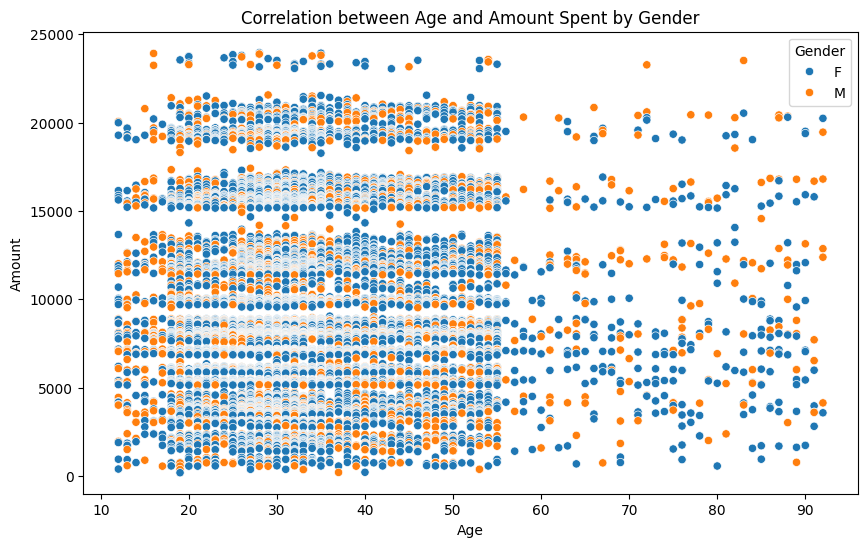

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Amount', hue='Gender', data=df)
plt.title('Correlation between Age and Amount Spent by Gender')
plt.show()